<a href="https://colab.research.google.com/github/RachaHachem/genetic-disorder-prediction-XAI/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study: Genetic Disorder Class & Subclass Predictions**

## EDA & Data Preprocessing

### **Import libraries.**

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

### **Load the dataset.**

In [ ]:
#install Kaggle
!wget "https://docs.google.com/uc?export=download&id=1Nrj8zK6bpHkdoi11gcWWLJSsSCCuMPRY" -O "kaggle.json"  

! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

--2022-05-21 14:41:48--  https://docs.google.com/uc?export=download&id=1Nrj8zK6bpHkdoi11gcWWLJSsSCCuMPRY
Resolving docs.google.com (docs.google.com)... 172.217.193.113, 172.217.193.139, 172.217.193.101, ...
Connecting to docs.google.com (docs.google.com)|172.217.193.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/o8aul4uumj0vbg96terhk95jkr2dqt43/1653144075000/06647553919662690540/*/1Nrj8zK6bpHkdoi11gcWWLJSsSCCuMPRY?e=download [following]
--2022-05-21 14:41:49--  https://doc-0o-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/o8aul4uumj0vbg96terhk95jkr2dqt43/1653144075000/06647553919662690540/*/1Nrj8zK6bpHkdoi11gcWWLJSsSCCuMPRY?e=download
Resolving doc-0o-6k-docs.googleusercontent.com (doc-0o-6k-docs.googleusercontent.com)... 108.177.11.132, 2607:f8b0:400c:c01::84
Connecting to doc-0o-6k-docs.googleusercontent.com (doc-0o-6k-docs.

In [ ]:
#check if Kaggle installation worked successfully
! kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muratkokludataset/date-fruit-datasets                                 Date Fruit Datasets                                 408KB  2022-04-03 09:25:39           8825       1176  0.9375           
victorsoeiro/netflix-tv-shows-and-movies                              Netflix TV Shows and Movies                           2MB  2022-05-15 00:01:23           1193         48  0.9411765        
mdmahmudulhasansuzan/students-adaptability-level-in-online-education  Students Adaptability Level in Online Education       6KB  2022-04-16 04:46:28           5879        150  1.0              
muratkokludataset/rice-image-d

In [ ]:
#load Kaggle dataset
! kaggle datasets download imsparsh/of-genomes-and-genetics-hackerearth-ml

  0% 0.00/2.07M [00:00<?, ?B/s]
100% 2.07M/2.07M [00:00<00:00, 114MB/s]


In [ ]:
#unzip the dataset folder
! unzip of-genomes-and-genetics-hackerearth-ml.zip

Archive:  of-genomes-and-genetics-hackerearth-ml.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


### **Read and visualize the dataset.**

In [ ]:
#read the train & test datasets
df = pd.read_csv('train.csv')

df.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


### **Perform exploratory data analysis (EDA).**

In [ ]:
#determine the shape of the dataset
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 22083 rows and 45 columns


In [ ]:
#check datatype, missing values, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

In [ ]:
#check the mean, std, min, max, etc. values for numerical features
df.describe()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
count,20656.000000,22083.000000,16047.000000,16097.000000,19956.0,19931.0,19936.0,19943.0,19913.0,19921.000000,19935.000000,19928.000000,19861.000000,19982.000000,19970.000000,19930.000000
mean,6.974148,4.898871,34.526454,41.972852,0.0,0.0,0.0,1.0,0.0,2.003062,7.486224,0.592483,0.551886,0.536233,0.497747,0.461917
std,4.319475,0.199663,9.852598,13.035501,0.0,0.0,0.0,0.0,0.0,1.411919,2.653393,0.491385,0.497313,0.498698,0.500007,0.498560
min,0.000000,4.092727,18.000000,20.000000,0.0,0.0,0.0,1.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.763109,26.000000,31.000000,0.0,0.0,0.0,1.0,0.0,1.000000,5.424703,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,4.899399,35.000000,42.000000,0.0,0.0,0.0,1.0,0.0,2.000000,7.477132,1.000000,1.000000,1.000000,0.000000,0.000000
75%,11.000000,5.033830,43.000000,53.000000,0.0,0.0,0.0,1.0,0.0,3.000000,9.526152,1.000000,1.000000,1.000000,1.000000,1.000000
max,14.000000,5.609829,51.000000,64.000000,0.0,0.0,0.0,1.0,0.0,4.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#check count, unique, top, freq for categorical features
df.describe(include='O')

,Patient Id,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Patient First Name,Family Name,Father's name,Institute Name,Location of Institute,...,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,Birth defects,Blood test result,Genetic Disorder,Disorder Subclass
count,22083,22083,21777,19273,22083,22083,12392,22083,16977,22083,...,19966,19931,19930,19888,19961,19911,19929,19938,19937,19915
unique,22083,2,2,2,2,2524,6282,16368,27,26,...,2,2,4,4,2,2,2,4,3,9
top,PID0x6418,Yes,No,Yes,No,James,Smith,Clardie,Not applicable,-,...,Yes,No,Not applicable,-,Yes,Yes,Singular,slightly abnormal,Mitochondrial genetic inheritance disorders,Leigh syndrome
freq,1,13143,13133,10647,12508,420,157,6,8440,10931,...,10087,10012,5029,5042,10012,10082,9977,5128,10202,5160


[link text](https://)### **Drop unnecessary features.**

In [ ]:
df = df.drop(columns=['Patient Id', 'Patient First Name', 'Family Name',
       "Father's name", 'Institute Name','Location of Institute','Parental consent',
       'Place of birth', 'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5'])

df.info() #check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 32 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       20656 non-null  float64
 1   Genes in mother's side                            22083 non-null  object 
 2   Inherited from father                             21777 non-null  object 
 3   Maternal gene                                     19273 non-null  object 
 4   Paternal gene                                     22083 non-null  object 
 5   Blood cell count (mcL)                            22083 non-null  float64
 6   Mother's age                                      16047 non-null  float64
 7   Father's age                                      16097 non-null  float64
 8   Status                                            22083 non-null  object 
 9   Respiratory Rate 

### **Visualize the features, and identify any outliers.**

In [ ]:
#use boxplot to identify outliers not visible in other graphs
#df.boxplot(column="Patient Age")

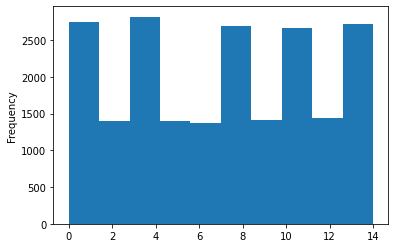

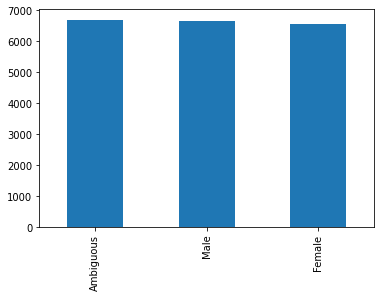

In [ ]:
df['Patient Age'].plot(kind = 'hist')
plt.show()
df['Gender'].value_counts().plot(kind = 'bar')
plt.show()

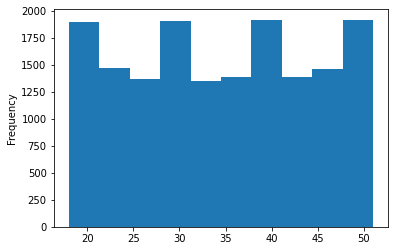

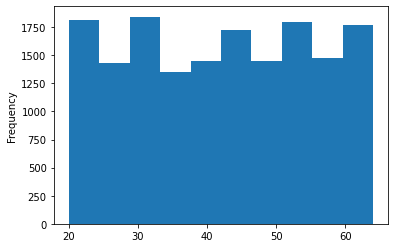

In [ ]:
df["Mother's age"].plot(kind = 'hist')
plt.show()
df["Father's age"].plot(kind = 'hist')
plt.show()

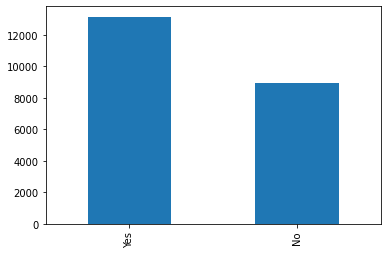

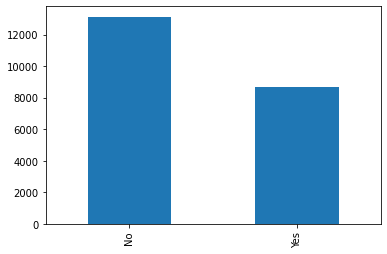

In [ ]:
df["Genes in mother's side"].value_counts().plot(kind = 'bar')
plt.show()
df["Inherited from father"].value_counts().plot(kind = 'bar')
plt.show()

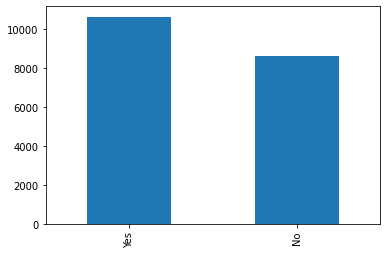

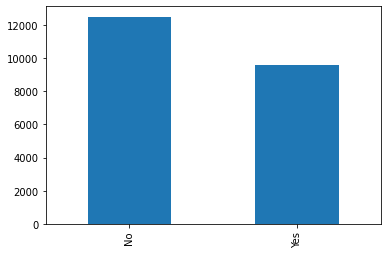

In [ ]:
df['Maternal gene'].value_counts().plot(kind = 'bar')
plt.show()
df['Paternal gene'].value_counts().plot(kind = 'bar')
plt.show()

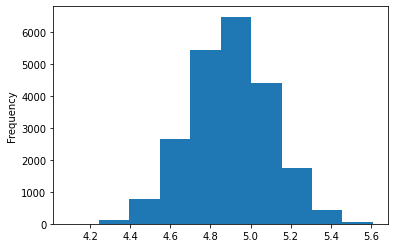

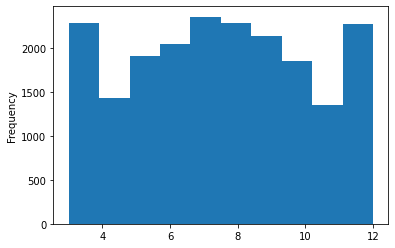

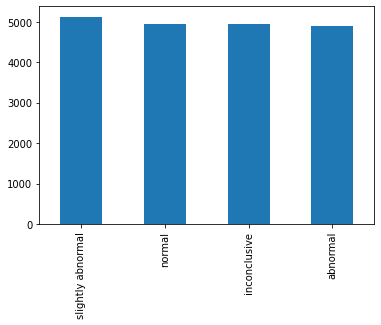

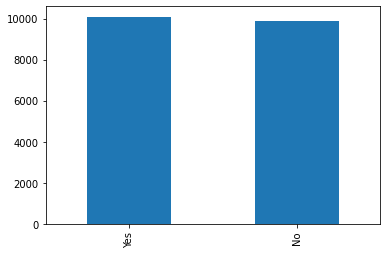

In [ ]:
df['Blood cell count (mcL)'].plot(kind = 'hist')
plt.show()
df['White Blood cell count (thousand per microliter)'].plot(kind = 'hist')
plt.show()
df['Blood test result'].value_counts().plot(kind = 'bar')
plt.show()
df['Folic acid details (peri-conceptional)'].value_counts().plot(kind = 'bar')
plt.show()

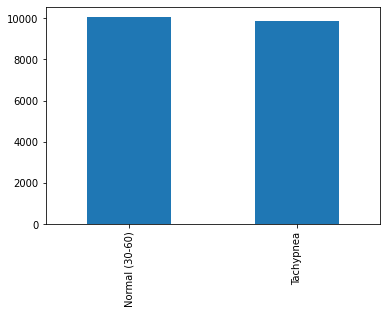

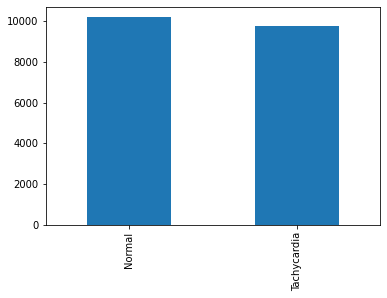

In [ ]:
df['Respiratory Rate (breaths/min)'].value_counts().plot(kind = 'bar')
plt.show()
df['Heart Rate (rates/min'].value_counts().plot(kind = 'bar')
plt.show()

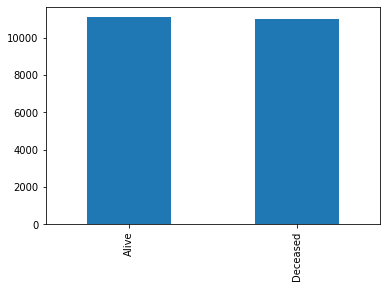

In [ ]:
df['Status'].value_counts().plot(kind = 'bar')

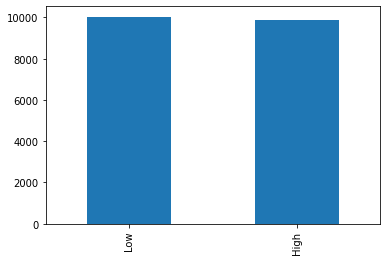

In [ ]:
df['Follow-up'].value_counts().plot(kind = 'bar')

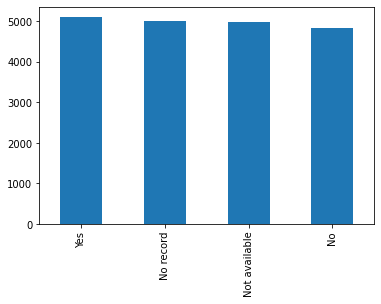

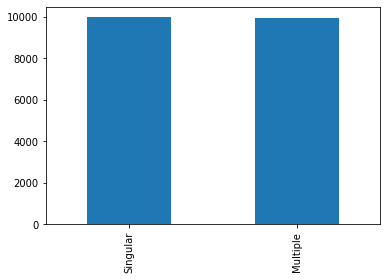

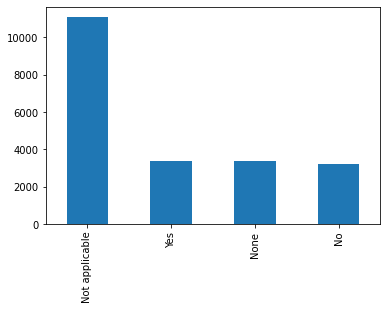

In [ ]:
df['Birth asphyxia'].value_counts().plot(kind = 'bar')
plt.show()
df['Birth defects'].value_counts().plot(kind = 'bar')
plt.show()
df['Autopsy shows birth defect (if applicable)'].value_counts().plot(kind = 'bar')
plt.show()

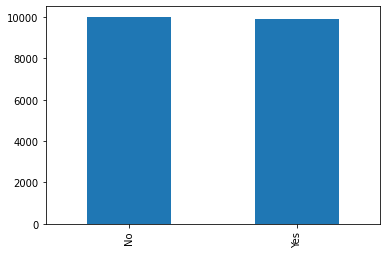

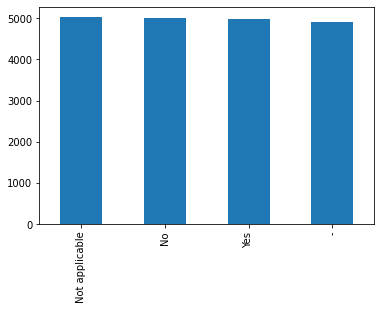

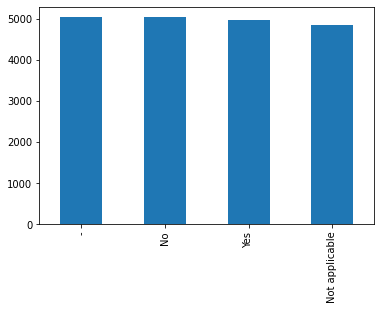

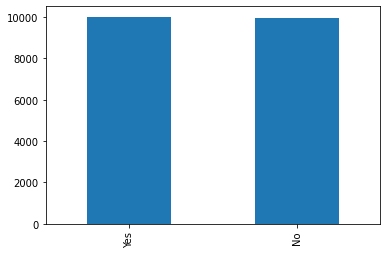

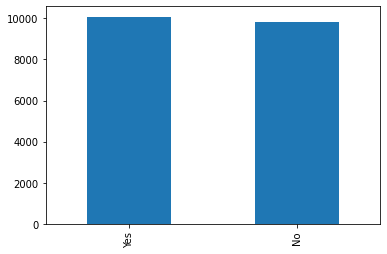

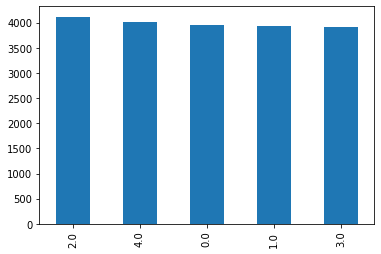

In [ ]:
df['H/O serious maternal illness'].value_counts().plot(kind = 'bar')
plt.show()
df['H/O radiation exposure (x-ray)'].value_counts().plot(kind = 'bar')
plt.show()
df['H/O substance abuse'].value_counts().plot(kind = 'bar')
plt.show()
df['Assisted conception IVF/ART'].value_counts().plot(kind = 'bar')
plt.show()
df['History of anomalies in previous pregnancies'].value_counts().plot(kind = 'bar')
plt.show()
df['No. of previous abortion'].value_counts().plot(kind = 'bar')
plt.show()

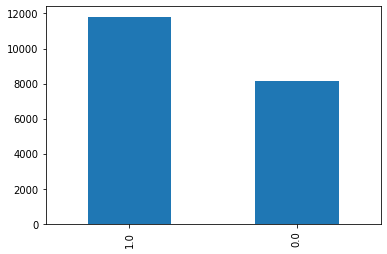

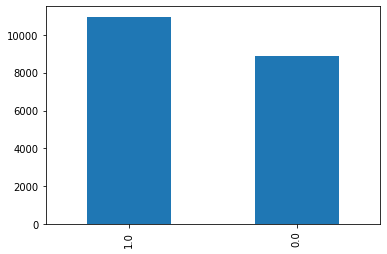

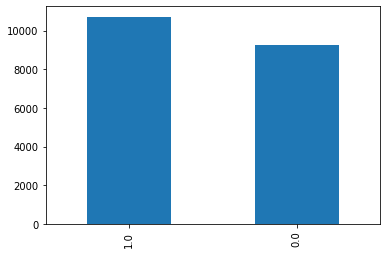

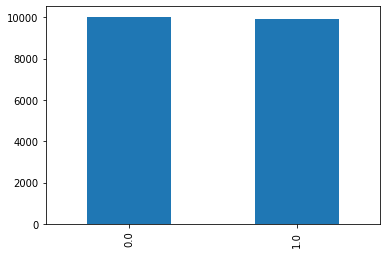

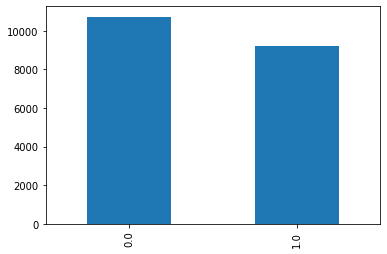

In [ ]:
df['Symptom 1'].value_counts().plot(kind = 'bar')
plt.show()
df['Symptom 2'].value_counts().plot(kind = 'bar')
plt.show()
df['Symptom 3'].value_counts().plot(kind = 'bar')
plt.show()
df['Symptom 4'].value_counts().plot(kind = 'bar')
plt.show()
df['Symptom 5'].value_counts().plot(kind = 'bar')
plt.show()

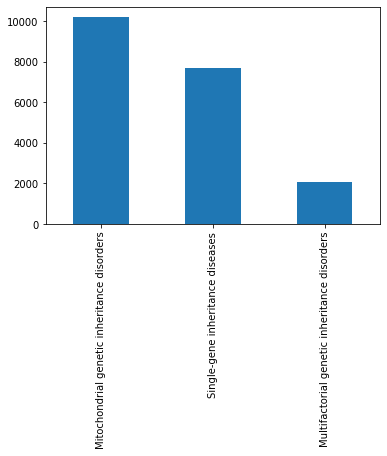

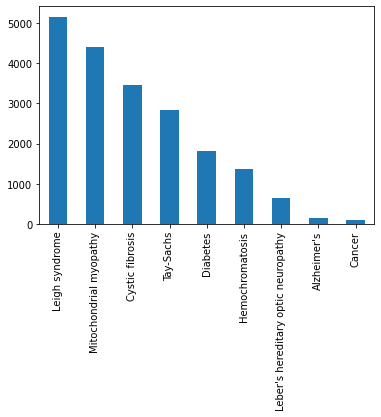

In [ ]:
df['Genetic Disorder'].value_counts().plot(kind = 'bar')
plt.show()
df['Disorder Subclass'].value_counts().plot(kind = 'bar')
plt.show()

### **Perform cross-tabbing to identify potential correlations between features.**

In [ ]:
#if any has strong correlation with class prediction, check for subclass prediction next.

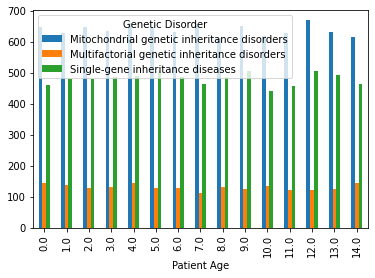

In [ ]:
age = pd.crosstab(df['Patient Age'],df['Genetic Disorder'])
# age
age.plot(kind='bar')

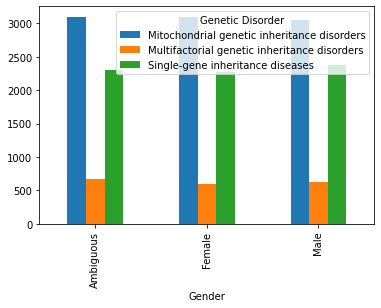

In [ ]:
gender = pd.crosstab(df['Gender'],df['Genetic Disorder'])
gender.plot(kind='bar')

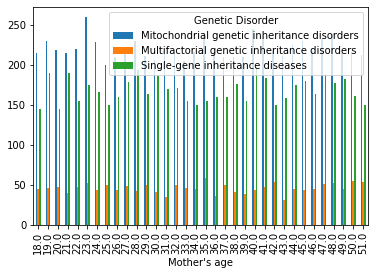

In [ ]:
mom_age = pd.crosstab(df["Mother's age"],df['Genetic Disorder'])
mom_age.plot(kind='bar')

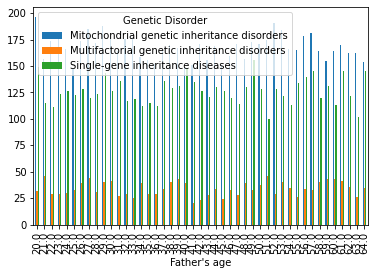

In [ ]:
dad_age = pd.crosstab(df["Father's age"],df['Genetic Disorder'])
dad_age.plot(kind='bar')

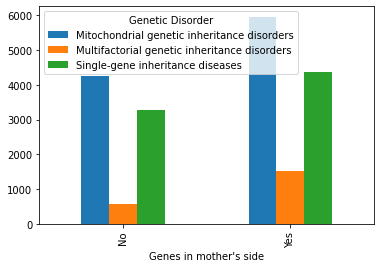

In [ ]:
mom_side_genes = pd.crosstab(df["Genes in mother's side"],df['Genetic Disorder'])
mom_side_genes.plot(kind='bar')

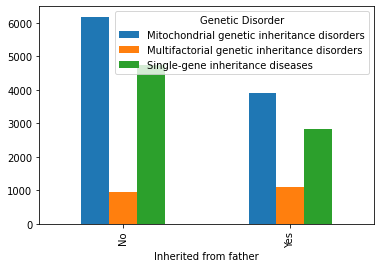

In [ ]:
dad_side_genes = pd.crosstab(df["Inherited from father"],df['Genetic Disorder'])
dad_side_genes.plot(kind='bar')

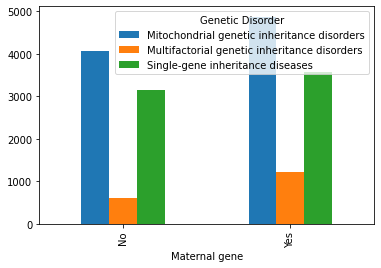

In [ ]:
maternal_gene = pd.crosstab(df['Maternal gene'],df['Genetic Disorder'])
maternal_gene.plot(kind='bar')

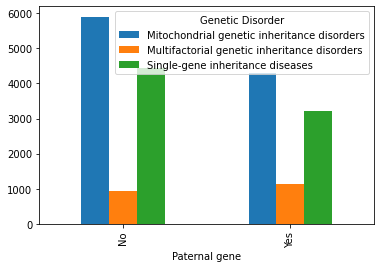

In [ ]:
paternal_gene = pd.crosstab(df['Paternal gene'],df['Genetic Disorder'])
paternal_gene.plot(kind='bar')

In [ ]:
# blood_cell_count = pd.crosstab(df['Blood cell count (mcL)'],df['Genetic Disorder'])
# blood_cell_count.plot(kind='bar')

In [ ]:
# white_blood = pd.crosstab(df['White Blood cell count (thousand per microliter)'],df['Genetic Disorder'])
# white_blood.plot(kind='bar')

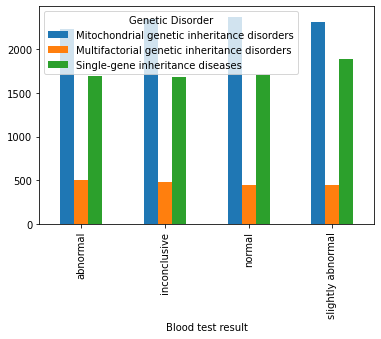

In [ ]:
blood_test = pd.crosstab(df['Blood test result'],df['Genetic Disorder'])
blood_test.plot(kind='bar')

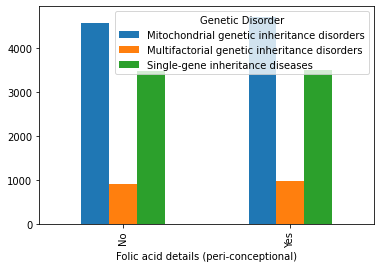

In [ ]:
folic_acid = pd.crosstab(df['Folic acid details (peri-conceptional)'],df['Genetic Disorder'])
folic_acid.plot(kind='bar')

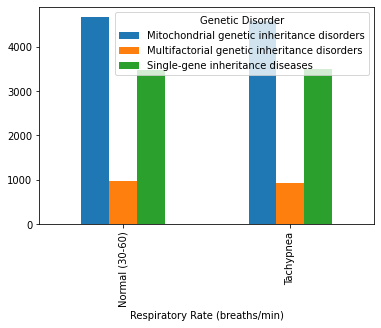

In [ ]:
respiratory_rate = pd.crosstab(df['Respiratory Rate (breaths/min)'],df['Genetic Disorder'])
respiratory_rate.plot(kind='bar')

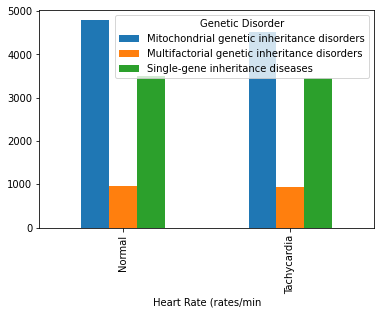

In [ ]:
heart_rate = pd.crosstab(df['Heart Rate (rates/min'],df['Genetic Disorder'])
heart_rate.plot(kind='bar')

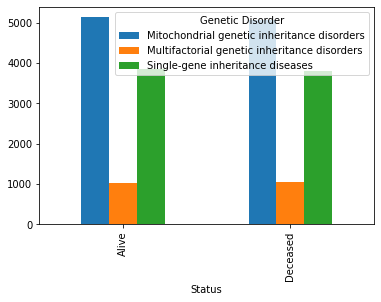

In [ ]:
status = pd.crosstab(df['Status'],df['Genetic Disorder'])
status.plot(kind='bar')

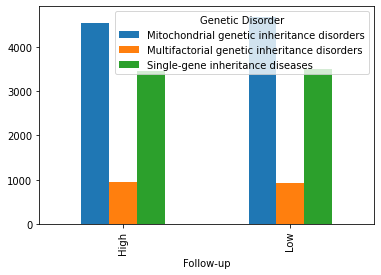

In [ ]:
follow_up = pd.crosstab(df['Follow-up'],df['Genetic Disorder'])
follow_up.plot(kind='bar')

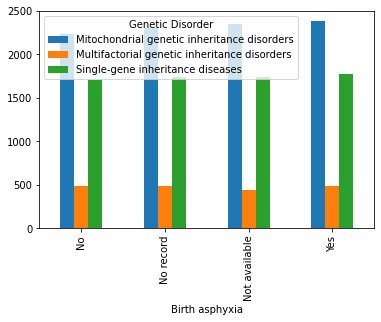

In [ ]:
birth_asphyxia = pd.crosstab(df['Birth asphyxia'],df['Genetic Disorder'])
birth_asphyxia.plot(kind='bar')

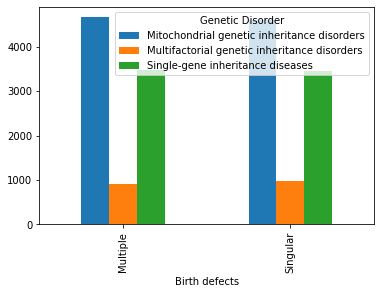

In [ ]:
birth_defects = pd.crosstab(df['Birth defects'],df['Genetic Disorder'])
birth_defects.plot(kind='bar')

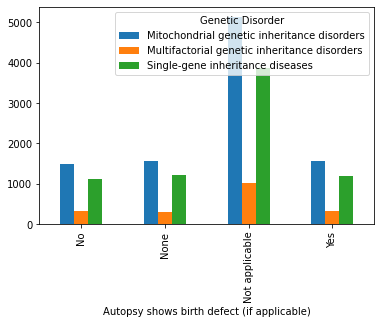

In [ ]:
#high correlation with Status
autopsy_birth_defects = pd.crosstab(df['Autopsy shows birth defect (if applicable)'],df['Genetic Disorder'])
autopsy_birth_defects.plot(kind='bar')

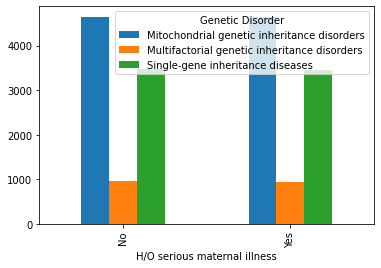

In [ ]:
history_maternal_illness = pd.crosstab(df['H/O serious maternal illness'],df['Genetic Disorder'])
history_maternal_illness.plot(kind='bar')

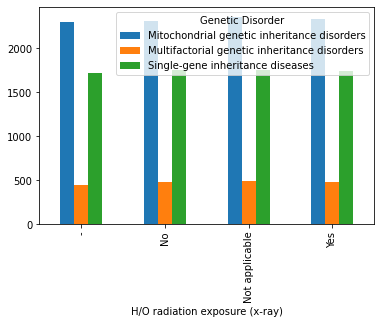

In [ ]:
history_radiation = pd.crosstab(df['H/O radiation exposure (x-ray)'],df['Genetic Disorder'])
history_radiation.plot(kind='bar')

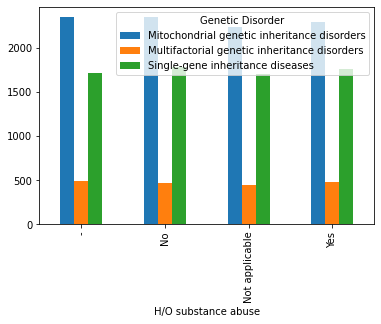

In [ ]:
history_substance_abuse = pd.crosstab(df['H/O substance abuse'],df['Genetic Disorder'])
history_substance_abuse.plot(kind='bar')

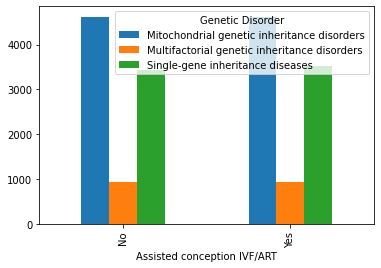

In [ ]:
ivf = pd.crosstab(df['Assisted conception IVF/ART'],df['Genetic Disorder'])
ivf.plot(kind='bar')

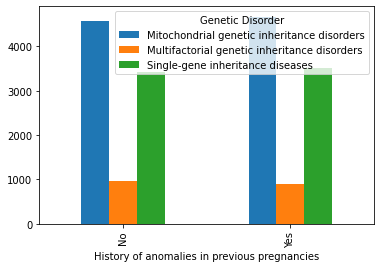

In [ ]:
anom_prev_preg = pd.crosstab(df['History of anomalies in previous pregnancies'],df['Genetic Disorder'])
anom_prev_preg.plot(kind='bar')

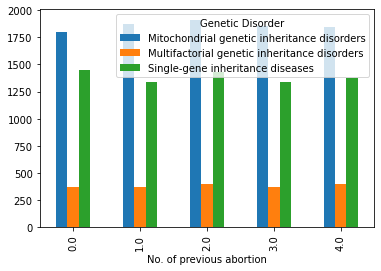

In [ ]:
abortion = pd.crosstab(df['No. of previous abortion'],df['Genetic Disorder'])
abortion.plot(kind='bar')

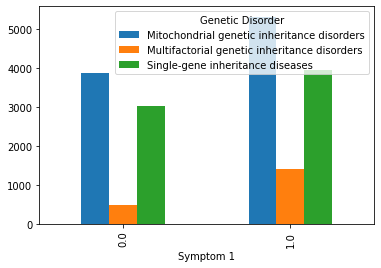

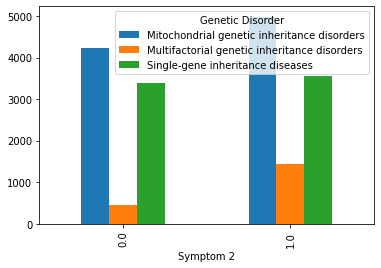

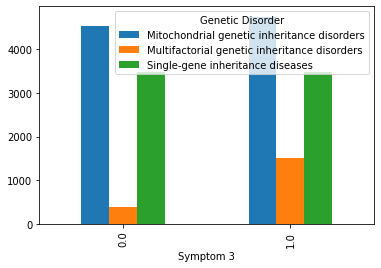

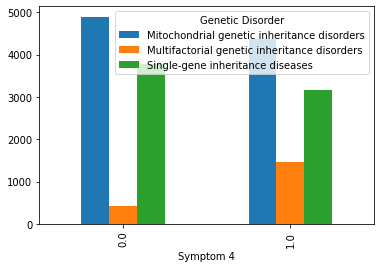

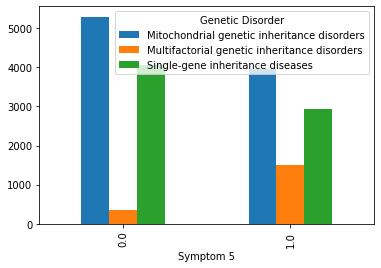

In [ ]:
symptom_1 = pd.crosstab(df['Symptom 1'],df['Genetic Disorder'])
symptom_1.plot(kind='bar')

symptom_2 = pd.crosstab(df['Symptom 2'],df['Genetic Disorder'])
symptom_2.plot(kind='bar')

symptom_3 = pd.crosstab(df['Symptom 3'],df['Genetic Disorder'])
symptom_3.plot(kind='bar')

symptom_4 = pd.crosstab(df['Symptom 4'],df['Genetic Disorder'])
symptom_4.plot(kind='bar')

symptom_5 = pd.crosstab(df['Symptom 5'],df['Genetic Disorder'])
symptom_5.plot(kind='bar')

In [ ]:
subclass_disorder = pd.crosstab(df["Genetic Disorder"],df["Disorder Subclass"], margins=True)
subclass_disorder

Disorder Subclass,Alzheimer's,Cancer,Cystic fibrosis,Diabetes,Hemochromatosis,Leber's hereditary optic neuropathy,Leigh syndrome,Mitochondrial myopathy,Tay-Sachs,All
Genetic Disorder,,,,,,,,,,
Mitochondrial genetic inheritance disorders,0,0,0,0,0,587,4683,3971,0,9241
Multifactorial genetic inheritance disorders,133,91,0,1653,0,0,0,0,0,1877
Single-gene inheritance diseases,0,0,3145,0,1228,0,0,0,2556,6929
All,133,91,3145,1653,1228,587,4683,3971,2556,18047


### **Treat missing data.**

In [ ]:
#check if there are null values
df.isnull().sum()

Patient Age                                         1427
Genes in mother's side                                 0
Inherited from father                                306
Maternal gene                                       2810
Paternal gene                                          0
Blood cell count (mcL)                                 0
Mother's age                                        6036
Father's age                                        5986
Status                                                 0
Respiratory Rate (breaths/min)                      2149
Heart Rate (rates/min                               2113
Follow-up                                           2166
Gender                                              2173
Birth asphyxia                                      2139
Autopsy shows birth defect (if applicable)          1026
Folic acid details (peri-conceptional)              2117
H/O serious maternal illness                        2152
H/O radiation exposure (x-ray) 

In [ ]:
df = df.drop(columns=['Birth asphyxia', 'Autopsy shows birth defect (if applicable)',
                      'H/O radiation exposure (x-ray)', 'H/O substance abuse'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 28 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       20656 non-null  float64
 1   Genes in mother's side                            22083 non-null  object 
 2   Inherited from father                             21777 non-null  object 
 3   Maternal gene                                     19273 non-null  object 
 4   Paternal gene                                     22083 non-null  object 
 5   Blood cell count (mcL)                            22083 non-null  float64
 6   Mother's age                                      16047 non-null  float64
 7   Father's age                                      16097 non-null  float64
 8   Status                                            22083 non-null  object 
 9   Respiratory Rate 

In [ ]:
#delete rows, or replace with mode if categorical and mean/median if numerical

df = df.dropna(subset=['Inherited from father'])
df['Patient Age'] = df['Patient Age'].fillna(df['Patient Age'].mean())
df["Mother's age"] = df["Mother's age"].fillna(df["Mother's age"].mean())
df["Father's age"] = df["Father's age"].fillna(df["Father's age"].mean())
df["Blood cell count (mcL)"] = df["Blood cell count (mcL)"].fillna(df["Blood cell count (mcL)"].mean())
df["White Blood cell count (thousand per microliter)"] = df["White Blood cell count (thousand per microliter)"].fillna(df["White Blood cell count (thousand per microliter)"].mean())
df["No. of previous abortion"] = df["No. of previous abortion"].fillna(df["No. of previous abortion"].median())

df['Symptom 1'] = df['Symptom 1'].fillna(df['Symptom 1'].mode()[0])
df['Symptom 2'] = df['Symptom 2'].fillna(df['Symptom 2'].mode()[0])
df['Symptom 3'] = df['Symptom 3'].fillna(df['Symptom 3'].mode()[0])
df['Symptom 4'] = df['Symptom 4'].fillna(df['Symptom 4'].mode()[0])
df['Symptom 5'] = df['Symptom 5'].fillna(df['Symptom 5'].mode()[0])
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Maternal gene'] = df['Maternal gene'].fillna(df['Maternal gene'].mode()[0])
df['Respiratory Rate (breaths/min)'] = df['Respiratory Rate (breaths/min)'].fillna(df['Respiratory Rate (breaths/min)'].mode()[0])
df['Heart Rate (rates/min'] = df['Heart Rate (rates/min'].fillna(df['Heart Rate (rates/min'].mode()[0])
df['Follow-up'] = df['Follow-up'].fillna(df['Follow-up'].mode()[0])
df['Folic acid details (peri-conceptional)'] = df['Folic acid details (peri-conceptional)'].fillna(df['Folic acid details (peri-conceptional)'].mode()[0])
df['H/O serious maternal illness'] = df['H/O serious maternal illness'].fillna(df['H/O serious maternal illness'].mode()[0])
df['Assisted conception IVF/ART'] = df['Assisted conception IVF/ART'].fillna(df['Assisted conception IVF/ART'].mode()[0])
df['History of anomalies in previous pregnancies'] = df['History of anomalies in previous pregnancies'].fillna(df['History of anomalies in previous pregnancies'].mode()[0])
df['Birth defects'] = df['Birth defects'].fillna(df['Birth defects'].mode()[0])
df['Blood test result'] = df['Blood test result'].fillna(df['Blood test result'].mode()[0])


df.isnull().sum()

Patient Age                                            0
Genes in mother's side                                 0
Inherited from father                                  0
Maternal gene                                          0
Paternal gene                                          0
Blood cell count (mcL)                                 0
Mother's age                                           0
Father's age                                           0
Status                                                 0
Respiratory Rate (breaths/min)                         0
Heart Rate (rates/min                                  0
Follow-up                                              0
Gender                                                 0
Folic acid details (peri-conceptional)                 0
H/O serious maternal illness                           0
Assisted conception IVF/ART                            0
History of anomalies in previous pregnancies           0
No. of previous abortion       

In [ ]:
null_disorders = df[df['Genetic Disorder'].isna()]
index_null = df['Genetic Disorder'].isna()

for i in range(len(null_disorders)):
 if(null_disorders.iloc[i]['Disorder Subclass'] == "Leber's hereditary optic neuropathy"	
    or null_disorders.iloc[i]['Disorder Subclass'] == "Leigh syndrome"
    or	null_disorders.iloc[i]['Disorder Subclass'] == "Mitochondrial myopathy"):
   df['Genetic Disorder'][df.index[index_null][i]] = 'Mitochondrial genetic inheritance disorders'

 elif(null_disorders.iloc[i]['Disorder Subclass'] == "Alzheimer's"	
    or null_disorders.iloc[i]['Disorder Subclass'] == "Cancer"
    or	null_disorders.iloc[i]['Disorder Subclass'] == "Diabetes"):
   df['Genetic Disorder'][df.index[index_null][i]] = 'Multifactorial genetic inheritance disorders'

 elif(null_disorders.iloc[i]['Disorder Subclass'] == "Cystic fibrosis"	
    or null_disorders.iloc[i]['Disorder Subclass'] == "Hemochromatosis"
    or null_disorders.iloc[i]['Disorder Subclass'] == "Tay-Sachs"):
   df['Genetic Disorder'][df.index[index_null][i]] = 'Single-gene inheritance diseases'

df[df['Genetic Disorder'].isna()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
80,2.000000,No,No,Yes,Yes,4.940671,31.000000,43.00000,Deceased,Normal (30-60),...,Singular,9.481868,inconclusive,1.0,1.0,1.0,1.0,1.0,NaN,NaN
89,12.000000,No,No,No,Yes,5.145456,34.522051,41.96821,Alive,Normal (30-60),...,Singular,4.874626,abnormal,0.0,1.0,0.0,0.0,1.0,NaN,NaN
240,2.000000,No,No,Yes,No,4.590071,34.522051,55.00000,Deceased,Normal (30-60),...,Multiple,8.298976,normal,1.0,0.0,1.0,1.0,0.0,NaN,NaN
262,1.000000,Yes,No,Yes,Yes,4.835174,29.000000,24.00000,Alive,Normal (30-60),...,Multiple,9.783686,slightly abnormal,1.0,1.0,0.0,1.0,1.0,NaN,NaN
485,14.000000,Yes,No,Yes,No,4.793518,47.000000,40.00000,Deceased,Tachypnea,...,Multiple,5.647696,abnormal,1.0,1.0,1.0,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21490,7.000000,No,No,Yes,No,5.007013,36.000000,57.00000,Alive,Normal (30-60),...,Singular,9.540844,slightly abnormal,0.0,0.0,0.0,1.0,0.0,NaN,NaN
21496,1.000000,Yes,No,Yes,Yes,4.921901,23.000000,47.00000,Deceased,Tachypnea,...,Singular,5.427841,inconclusive,0.0,1.0,0.0,0.0,1.0,NaN,NaN
21565,6.967076,Yes,Yes,Yes,Yes,4.733504,32.000000,41.96821,Alive,Normal (30-60),...,Multiple,6.483751,slightly abnormal,1.0,1.0,1.0,1.0,0.0,NaN,NaN
21645,6.967076,Yes,Yes,Yes,No,5.131746,27.000000,41.96821,Deceased,Normal (30-60),...,Singular,7.477132,normal,1.0,1.0,1.0,0.0,1.0,NaN,NaN


In [ ]:
#temporary deletion of null rows in class and sublass
df = df.dropna(subset=['Genetic Disorder','Disorder Subclass'])
df.isnull().sum()

Patient Age                                         0
Genes in mother's side                              0
Inherited from father                               0
Maternal gene                                       0
Paternal gene                                       0
Blood cell count (mcL)                              0
Mother's age                                        0
Father's age                                        0
Status                                              0
Respiratory Rate (breaths/min)                      0
Heart Rate (rates/min                               0
Follow-up                                           0
Gender                                              0
Folic acid details (peri-conceptional)              0
H/O serious maternal illness                        0
Assisted conception IVF/ART                         0
History of anomalies in previous pregnancies        0
No. of previous abortion                            0
Birth defects               

In [ ]:
df.isnull().sum().any() #check

False

### **Save dataset.**

In [ ]:
df.to_csv('Genetic_Disorder_Dataset.csv', index=False)

### **Encode categorical data.**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_data = df[["Genes in mother's side",'Inherited from father','Maternal gene','Paternal gene','Status',
               'Respiratory Rate (breaths/min)','Heart Rate (rates/min','Follow-up','Gender',
               'Folic acid details (peri-conceptional)','H/O serious maternal illness','Assisted conception IVF/ART',
               'History of anomalies in previous pregnancies','Birth defects','Blood test result',
               'Symptom 1','Symptom 2','Symptom 3','Symptom 4','Symptom 5', 'Genetic Disorder', 'Disorder Subclass']]
num_data = df[['Patient Age','Blood cell count (mcL)',"Mother's age","Father's age",'No. of previous abortion',
               'White Blood cell count (thousand per microliter)']]

cat_data.head()

,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,Gender,Folic acid details (peri-conceptional),...,History of anomalies in previous pregnancies,Birth defects,Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,Yes,No,Yes,No,Alive,Normal (30-60),Normal,High,Ambiguous,No,...,Yes,Singular,slightly abnormal,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,Yes,Yes,No,No,Deceased,Tachypnea,Normal,High,Ambiguous,Yes,...,Yes,Multiple,normal,1.0,1.0,1.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
2,Yes,No,No,No,Alive,Normal (30-60),Tachycardia,Low,Ambiguous,Yes,...,Yes,Singular,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,Yes,No,Yes,No,Deceased,Tachypnea,Normal,High,Male,No,...,Yes,Singular,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,Yes,No,Yes,Yes,Alive,Tachypnea,Tachycardia,Low,Male,No,...,No,Multiple,slightly abnormal,0.0,0.0,0.0,0.0,0.0,Multifactorial genetic inheritance disorders,Cancer


In [ ]:
for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])
cat_data.head()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,Gender,Folic acid details (peri-conceptional),...,History of anomalies in previous pregnancies,Birth defects,Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,1,0,1,0,0,0,0,0,0,0,...,1,1,3,1,1,1,1,1,0,5
1,1,1,0,0,1,1,0,0,0,1,...,1,0,2,1,1,1,1,0,2,2
2,1,0,0,0,0,0,1,1,0,1,...,1,1,2,0,1,1,1,1,1,3
3,1,0,1,0,1,1,0,0,2,0,...,1,1,1,0,0,1,0,0,0,6
4,1,0,1,1,0,1,1,1,2,0,...,0,0,3,0,0,0,0,0,1,1


In [ ]:
from keras.utils import np_utils

genetic_disorder = np_utils.to_categorical(cat_data['Genetic Disorder'])
subclass_disorder = np_utils.to_categorical(cat_data['Disorder Subclass'])

In [ ]:
cat_data = cat_data.drop(columns=['Genetic Disorder', 'Disorder Subclass'])
df_encoded = pd.concat([num_data, cat_data], axis=1)
df_encoded.head()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,No. of previous abortion,White Blood cell count (thousand per microliter),Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,...,H/O serious maternal illness,Assisted conception IVF/ART,History of anomalies in previous pregnancies,Birth defects,Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,2.0,4.760603,34.522051,41.96821,2.0,9.857562,1,0,1,0,...,0,0,1,1,3,1,1,1,1,1
1,4.0,4.910669,34.522051,23.00000,2.0,5.522560,1,1,0,0,...,1,0,1,0,2,1,1,1,1,0
2,6.0,4.893297,41.000000,22.00000,4.0,7.485256,1,0,0,0,...,0,1,1,1,2,0,1,1,1,1
3,12.0,4.705280,21.000000,41.96821,1.0,7.919321,1,0,1,0,...,1,1,1,1,1,0,0,1,0,0
4,11.0,4.720703,32.000000,41.96821,4.0,4.098210,1,0,1,1,...,1,1,0,0,3,0,0,0,0,0


### **Normalize data.**

In [ ]:
df_max = df_encoded.max()
df_encoded = df_encoded.divide(df_max)

df_encoded.describe() #check

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,No. of previous abortion,White Blood cell count (thousand per microliter),Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,...,H/O serious maternal illness,Assisted conception IVF/ART,History of anomalies in previous pregnancies,Birth defects,Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
count,19652.000000,19652.000000,19652.000000,19652.000000,19652.000000,19652.000000,19652.000000,19652.000000,19652.000000,19652.000000,...,19652.000000,19652.000000,19652.000000,19652.000000,19652.000000,19652.000000,19652.000000,19652.000000,19652.000000,19652.000000
mean,0.495984,0.873268,0.677206,0.655609,0.500305,0.623533,0.596123,0.396397,0.604722,0.432577,...,0.451964,0.546662,0.552107,0.546407,0.551462,0.630521,0.593782,0.579229,0.454101,0.419347
std,0.298688,0.035616,0.166122,0.176205,0.335979,0.210753,0.490686,0.489161,0.488923,0.495446,...,0.497700,0.497831,0.497290,0.497854,0.383526,0.482676,0.491139,0.493695,0.497902,0.493465
min,0.000000,0.729564,0.352941,0.312500,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.214286,0.849081,0.568627,0.531250,0.250000,0.469879,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.497648,0.873382,0.676903,0.655753,0.500000,0.623771,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.666667,1.000000,1.000000,1.000000,0.000000,0.000000
75%,0.714286,0.897295,0.784314,0.781250,0.750000,0.774299,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Building the model

### **Build the model.**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(32, input_dim = 26, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(3, activation = "softmax")) 

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 32)                864       
                                                                 
 dense_76 (Dense)            (None, 16)                528       
                                                                 
 dense_77 (Dense)            (None, 8)                 136       
                                                                 
 dense_78 (Dense)            (None, 4)                 36        
                                                                 
 dense_79 (Dense)            (None, 3)                 15        
                                                                 
Total params: 1,579
Trainable params: 1,579
Non-trainable params: 0
_________________________________________________________________


### **Compile and fit the model.**

In [ ]:
from sklearn.model_selection import train_test_split

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Precision', 'Recall'])
# it should be one-hot encoding
# or sparse categorical_crossentropy -> label encoder -> faster but not more accurate


x = df_encoded
y = genetic_disorder

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=50)

Epoch 1/50
315/315 [==============================] - 7s 13ms/step - loss: 0.9175 - accuracy: 0.5145 - precision: 0.5388 - recall: 0.3416 - val_loss: 0.8933 - val_accuracy: 0.5078 - val_precision: 0.5446 - val_recall: 0.3584
Epoch 2/50
315/315 [==============================] - 3s 9ms/step - loss: 0.8643 - accuracy: 0.5435 - precision: 0.6032 - recall: 0.4332 - val_loss: 0.8626 - val_accuracy: 0.5630 - val_precision: 0.6111 - val_recall: 0.4897
Epoch 3/50
315/315 [==============================] - 3s 9ms/step - loss: 0.8232 - accuracy: 0.5783 - precision: 0.6539 - recall: 0.4804 - val_loss: 0.8276 - val_accuracy: 0.5770 - val_precision: 0.6496 - val_recall: 0.4755
Epoch 4/50
315/315 [==============================] - 3s 8ms/step - loss: 0.8036 - accuracy: 0.5958 - precision: 0.6692 - recall: 0.4835 - val_loss: 0.8341 - val_accuracy: 0.5892 - val_precision: 0.6511 - val_recall: 0.4401
Epoch 5/50
315/315 [==============================] - 2s 7ms/step - loss: 0.7965 - accuracy: 0.6100 - p

### **Evaluate the model.**

In [ ]:
model.evaluate(x_test, y_test)

123/123 [==============================] - 0s 2ms/step - loss: 0.8208 - accuracy: 0.6054 - precision: 0.6363 - recall: 0.5322


[0.8207922577857971, 0.6054438948631287, 0.6362530589103699, 0.53218013048172]

### **Data balancing.**

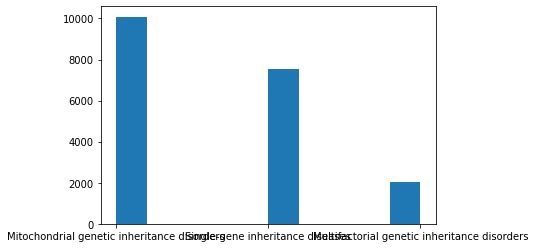

In [ ]:
# plt.hist(genetic_disorder)
plt.hist(df['Genetic Disorder'])

plt.show()

(array([10084.,     0.,     0.,     0.,     0., 10084.,     0.,     0.,
            0., 10084.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

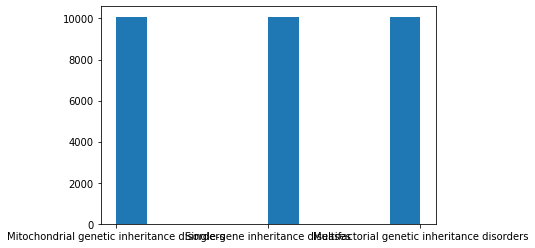

In [ ]:
from imblearn.over_sampling import SMOTE

# x_new = concat df_encoded and df['Disorder Subclass']
x_new = df_encoded
y_new = df.iloc[:,-2]
 
over = SMOTE()
x_new, y_new = over.fit_resample(x_new, y_new)
plt.hist([y_new])

In [ ]:
y_new = le.fit_transform(y_new)
y_new = np_utils.to_categorical(y_new)
y_new

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
# df_new = pd.concat([x_new, y_new], axis=1)
# df_new = df_new.divide(df_new.max())

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Precision', 'Recall'])

# x = df_new.iloc[:,:-1]
# y = df_new.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2)

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=50)

Epoch 1/50
485/485 [==============================] - 3s 3ms/step - loss: 0.7819 - accuracy: 0.6469 - precision: 0.6957 - recall: 0.5511 - val_loss: 0.7453 - val_accuracy: 0.6683 - val_precision: 0.7082 - val_recall: 0.5860
Epoch 2/50
485/485 [==============================] - 1s 3ms/step - loss: 0.7611 - accuracy: 0.6533 - precision: 0.6950 - recall: 0.5776 - val_loss: 0.7496 - val_accuracy: 0.6650 - val_precision: 0.6991 - val_recall: 0.5931
Epoch 3/50
485/485 [==============================] - 1s 3ms/step - loss: 0.7563 - accuracy: 0.6551 - precision: 0.6937 - recall: 0.5881 - val_loss: 0.7565 - val_accuracy: 0.6551 - val_precision: 0.7017 - val_recall: 0.5953
Epoch 4/50
485/485 [==============================] - 1s 3ms/step - loss: 0.7513 - accuracy: 0.6564 - precision: 0.6937 - recall: 0.5889 - val_loss: 0.7344 - val_accuracy: 0.6744 - val_precision: 0.7110 - val_recall: 0.6006
Epoch 5/50
485/485 [==============================] - 1s 3ms/step - loss: 0.7477 - accuracy: 0.6586 - pr

### **Hyperparameters tuning.**

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

def create_model():
  model = Sequential()
  model.add(Dense(32, input_dim = 26, activation = 'relu'))
  model.add(Dense(16, activation = 'relu'))
  model.add(Dense(8, activation = 'relu'))
  model.add(Dense(4, activation = 'relu'))
  model.add(Dense(3, activation = "softmax"))
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return model

model = KerasClassifier(build_fn=create_model)

KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


In [ ]:
from sklearn.model_selection import GridSearchCV

params={'batch_size':[50, 100], 
        'nb_epoch':[50, 100]
        }

search = GridSearchCV(estimator=model, param_grid=params, cv=3)
search.fit(x_train, y_train)

print("Best params:", search.best_params_)
print("Best score:", search.best_score_)

485/485 [==============================] - 1s 2ms/step - loss: 0.9696 - accuracy: 0.5286
Best params: {'batch_size': 50, 'nb_epoch': 100}
Best score: 0.5800586541493734


### **Test on best params.**

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim = 26, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(3, activation = "softmax")) 

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Precision', 'Recall'])

epochs = search.best_params_.get('nb_epoch')
batch_size = search.best_params_.get('batch_size')

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/100
485/485 [==============================] - 3s 4ms/step - loss: 0.9755 - accuracy: 0.5139 - precision: 0.7135 - recall: 0.1950 - val_loss: 0.9028 - val_accuracy: 0.5730 - val_precision: 0.7300 - val_recall: 0.2462
Epoch 2/100
485/485 [==============================] - 1s 3ms/step - loss: 0.8840 - accuracy: 0.5636 - precision: 0.6974 - recall: 0.3190 - val_loss: 0.8380 - val_accuracy: 0.5753 - val_precision: 0.6997 - val_recall: 0.4290
Epoch 3/100
485/485 [==============================] - 1s 3ms/step - loss: 0.8412 - accuracy: 0.6055 - precision: 0.6808 - recall: 0.4370 - val_loss: 0.8145 - val_accuracy: 0.6396 - val_precision: 0.7089 - val_recall: 0.4705
Epoch 4/100
485/485 [==============================] - 1s 3ms/step - loss: 0.8200 - accuracy: 0.6285 - precision: 0.6834 - recall: 0.5168 - val_loss: 0.7997 - val_accuracy: 0.6368 - val_precision: 0.6955 - val_recall: 0.5350
Epoch 5/100
485/485 [==============================] - 1s 3ms/step - loss: 0.8078 - accuracy: 0.6299

### **Evaluate feature importance.**

In [ ]:
!pip install lifelines
!pip install shap

In [ ]:
#feature importance for neural network using SHAP
import matplotlib.pyplot as plt
import sklearn
import lifelines
import shap

features = ['Patient Age','Blood cell count (mcL)',"Mother's age","Father's age",'No. of previous abortion',
               'White Blood cell count (thousand per microliter)', "Genes in mother's side",'Inherited from father','Maternal gene','Paternal gene','Status',
               'Respiratory Rate (breaths/min)','Heart Rate (rates/min','Follow-up','Gender',
               'Folic acid details (peri-conceptional)','H/O serious maternal illness','Assisted conception IVF/ART',
               'History of anomalies in previous pregnancies','Birth defects','Blood test result',
               'Symptom 1','Symptom 2','Symptom 3','Symptom 4','Symptom 5', 'Genetic Disorder']


e = shap.KernelExplainer(model.predict, x_train.head(50))
shap_values = e.shap_values(x_test.iloc[0,:])

shap.initjs()
# visualize the first prediction's explanation with a force plot
shap.force_plot(e.expected_value[0], shap_values[0], x_test.iloc[0,:])

# shap.summary_plot(shap_values[0], x_train, plot_type="bar")

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight